In [21]:
# Import library
from dfllama import DefiLlamaClient, Coin
# Client object to interact with DeFi Llama API
client = DefiLlamaClient()


from prophet import Prophet
import pandas as pd
import copy
import time
from datetime import datetime as dt
from matplotlib import pyplot as plt
%matplotlib inline
from bokeh.plotting import figure, show
from bokeh.models import Span
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource as cds
from bokeh.models import HoverTool
from bokeh.models import NumeralTickFormatter
output_notebook()

pd.set_option('display.max_columns', 500)

Loading BokehJS ...

In [29]:
from dfllama import DefiLlamaClient, Coin
client = DefiLlamaClient()
protocols = client.get_protocols()
df = pd.DataFrame(protocols)
df.head()

,id,name,address,symbol,url,description,chain,logo,audits,audit_note,gecko_id,cmcId,category,chains,module,twitter,forkedFrom,oracles,listedAt,methodology,slug,tvl,chainTvls,change_1h,change_1d,change_7d,tokenBreakdowns,mcap,referralUrl,treasury,audit_links,openSource,governanceID,github,hallmarks,parentProtocol,wrongLiquidity,misrepresentedTokens,staking,pool2,assetToken,language,stablecoins,oraclesByChain,deadUrl,rugged,deadFrom
0,2269,Binance CEX,None,-,https://www.binance.com,Binance is a cryptocurrency exchange which is ...,Multi-Chain,https://icons.llama.fi/binance-cex.jpg,0,None,None,None,CEX,"[Bitcoin, Ethereum, Tron, Binance, Arbitrum, S...",binance/index.js,binance,[],[],1.668171e+09,We collect the wallets from this binance blog ...,binance-cex,8.157674e+10,"{'Aptos': 0, 'Solana': 2439597219.9366226, 'Al...",0.391353,-0.123997,4.180259,{},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,182,Lido,0x5a98fcbea516cf06857215779fd812ca3bef1b32,LDO,https://lido.fi/,Liquid staking for Ethereum and Polygon. Daily...,Multi-Chain,https://icons.llama.fi/lido.png,2,None,lido-dao,8000,Liquid Staking,"[Ethereum, Solana, Moonbeam, Moonriver, Terra]",lido/index.js,LidoFinance,NaN,NaN,NaN,Staked tokens are counted as TVL based on the ...,lido,2.240311e+10,"{'Terra': 0, 'Moonbeam': 275999.7959240732, 'E...",1.300753,3.391678,8.361989,{},2.788265e+09,https://stake.lido.fi/?ref=0x08a3c2A819E3de7AC...,lido.js,[https://github.com/lidofinance/audits],True,[snapshot:lido-snapshot.eth],[lidofinance],"[[1610496000, Start of incentives for curve po...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2272,OKX,None,-,https://www.okx.com,"OKX, formerly known as OKEx, is a Seychelles-b...",Multi-Chain,https://icons.llama.fi/okx.jpg,0,None,None,None,CEX,"[Ethereum, Bitcoin, Tron, Solana, Litecoin, Op...",okex/index.js,okx,[],[],1.668186e+09,NaN,okx,1.559423e+10,"{'Aptos': 0, 'Solana': 283812766.45235467, 'zk...",0.235640,2.368873,8.538004,{},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2275,Bitfinex,None,-,https://www.bitfinex.com,Bitfinex facilitates a graphical trading exper...,Multi-Chain,https://icons.llama.fi/bitfinex.png,0,None,None,None,CEX,"[Bitcoin, Ethereum, Tron, Solana, Polygon, Ava...",bitfinex/index.js,bitfinex,[],[],1.668202e+09,NaN,bitfinex,1.382966e+10,"{'Fantom': 4627740.607027603, 'Cardano': 65472...",-0.253377,1.158283,10.376673,{},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3732,Robinhood,None,-,https://robinhood.com,Democratizing finance for all. Crypto trading:...,Multi-Chain,https://icons.llama.fi/robinhood.jpg,0,None,None,None,CEX,"[Bitcoin, Ethereum, Avalanche, Polygon]",robinhood/index.js,RobinhoodApp,[],[],NaN,NaN,robinhood,9.468525e+09,"{'Ethereum': 3771055047.934795, 'Avalanche': 3...",0.416749,1.426404,8.236588,{},NaN,NaN,NaN,NaN,NaN,NaN,[robinhood],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df.shape

(3828, 47)

In [ ]:
# https://medium.com/@praxs/defillama-curl-python-api-a413b59157b0

In [30]:
labels = ['id', 'url', 'description', 'logo', 'audits', 'audit_note', 
          'gecko_id', 'cmcId', 'module', 'twitter', 'audit_links', 
          'oracles', 'language', 'openSource', 'pool2', 
          'forkedFrom', 'listedAt',]

df.drop(labels=labels, axis=1, inplace=True)

df.head()

,name,address,symbol,chain,category,chains,methodology,slug,tvl,chainTvls,change_1h,change_1d,change_7d,tokenBreakdowns,mcap,referralUrl,treasury,governanceID,github,hallmarks,parentProtocol,wrongLiquidity,misrepresentedTokens,staking,assetToken,stablecoins,oraclesByChain,deadUrl,rugged,deadFrom
0,Binance CEX,None,-,Multi-Chain,CEX,"[Bitcoin, Ethereum, Tron, Binance, Arbitrum, S...",We collect the wallets from this binance blog ...,binance-cex,8.157674e+10,"{'Aptos': 0, 'Solana': 2439597219.9366226, 'Al...",0.391353,-0.123997,4.180259,{},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Lido,0x5a98fcbea516cf06857215779fd812ca3bef1b32,LDO,Multi-Chain,Liquid Staking,"[Ethereum, Solana, Moonbeam, Moonriver, Terra]",Staked tokens are counted as TVL based on the ...,lido,2.240311e+10,"{'Terra': 0, 'Moonbeam': 275999.7959240732, 'E...",1.300753,3.391678,8.361989,{},2.788265e+09,https://stake.lido.fi/?ref=0x08a3c2A819E3de7AC...,lido.js,[snapshot:lido-snapshot.eth],[lidofinance],"[[1610496000, Start of incentives for curve po...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,OKX,None,-,Multi-Chain,CEX,"[Ethereum, Bitcoin, Tron, Solana, Litecoin, Op...",NaN,okx,1.559423e+10,"{'Aptos': 0, 'Solana': 283812766.45235467, 'zk...",0.235640,2.368873,8.538004,{},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bitfinex,None,-,Multi-Chain,CEX,"[Bitcoin, Ethereum, Tron, Solana, Polygon, Ava...",NaN,bitfinex,1.382966e+10,"{'Fantom': 4627740.607027603, 'Cardano': 65472...",-0.253377,1.158283,10.376673,{},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Robinhood,None,-,Multi-Chain,CEX,"[Bitcoin, Ethereum, Avalanche, Polygon]",NaN,robinhood,9.468525e+09,"{'Ethereum': 3771055047.934795, 'Avalanche': 3...",0.416749,1.426404,8.236588,{},NaN,NaN,NaN,NaN,[robinhood],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# Sort values based on market cap in descending order
df.sort_values(by='mcap', ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head(10)

,name,address,symbol,chain,category,chains,methodology,slug,tvl,chainTvls,change_1h,change_1d,change_7d,tokenBreakdowns,mcap,referralUrl,treasury,governanceID,github,hallmarks,parentProtocol,wrongLiquidity,misrepresentedTokens,staking,assetToken,stablecoins,oraclesByChain,deadUrl,rugged,deadFrom
0,Bitcoin,None,BTC,Bitcoin,Chain,[Bitcoin],NaN,bitcoin,0.000000e+00,{'Bitcoin': 0},NaN,NaN,NaN,{},8.494501e+11,NaN,NaN,NaN,NaN,[],NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Avalanche,,AVAX,Avalanche,Services,[Avalanche],NaN,avalanche,0.000000e+00,{'Avalanche': 0},NaN,NaN,NaN,{},1.329572e+10,NaN,NaN,NaN,NaN,[],NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Polygon Bridge & Staking,0x7d1afa7b718fb893db30a3abc0cfc608aacfebb0,MATIC,Polygon,Chain,[Polygon],NaN,polygon-bridge-&-staking,6.387605e+09,{'Polygon': 6387604884.3668785},0.108715,1.588525,9.619229,{},7.600747e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NEAR,None,-,Near,Chain,[Near],NaN,near,0.000000e+00,{'Near': 0},NaN,NaN,NaN,{},3.303529e+09,NaN,NaN,NaN,NaN,[],NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Injective Bridge,0xe28b3b32b6c345a34ff64674606124dd5aceca30,INJ,Ethereum,Bridge,[Ethereum],TVL accounts for all liquidity on the Injectiv...,injective-bridge,3.659598e+07,{'Ethereum': 36595975.247336954},3.937995,3.418304,11.265646,{},3.260145e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Aptos,None,APT,Aptos,Chain,[Aptos],NaN,aptos,0.000000e+00,{'Aptos': 0},NaN,NaN,NaN,{},3.175360e+09,NaN,NaN,NaN,NaN,[],NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ImmutableX,0xf57e7e7c23978c3caec3c3548e3d615c346e79ff,IMX,Ethereum,NFT Marketplace,[Ethereum],NaN,immutablex,3.624419e+07,"{'Ethereum-staking': 163987739.80126753, 'Ethe...",0.333807,0.019433,9.091057,{},2.795643e+09,NaN,NaN,NaN,[immutable],"[[1643241600, OMI migration]]",NaN,NaN,NaN,1.639877e+08,NaN,NaN,NaN,NaN,NaN,NaN
7,Lido,0x5a98fcbea516cf06857215779fd812ca3bef1b32,LDO,Multi-Chain,Liquid Staking,"[Ethereum, Solana, Moonbeam, Moonriver, Terra]",Staked tokens are counted as TVL based on the ...,lido,2.240311e+10,"{'Terra': 0, 'Moonbeam': 275999.7959240732, 'E...",1.300753,3.391678,8.361989,{},2.788265e+09,https://stake.lido.fi/?ref=0x08a3c2A819E3de7AC...,lido.js,[snapshot:lido-snapshot.eth],[lidofinance],"[[1610496000, Start of incentives for curve po...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Arbitrum,None,ARB,Arbitrum,Chain,[Arbitrum],NaN,arbitrum,0.000000e+00,{'Arbitrum': 0},NaN,NaN,NaN,{},2.487322e+09,NaN,NaN,NaN,NaN,[],NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Stacks Staking,None,STX,Stacks,Chain,[Stacks],NaN,stacks-staking,0.000000e+00,{'Stacks': 0},NaN,NaN,NaN,{},2.244000e+09,NaN,NaN,NaN,[stacks-network],[],NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: ylabel='mcap'>

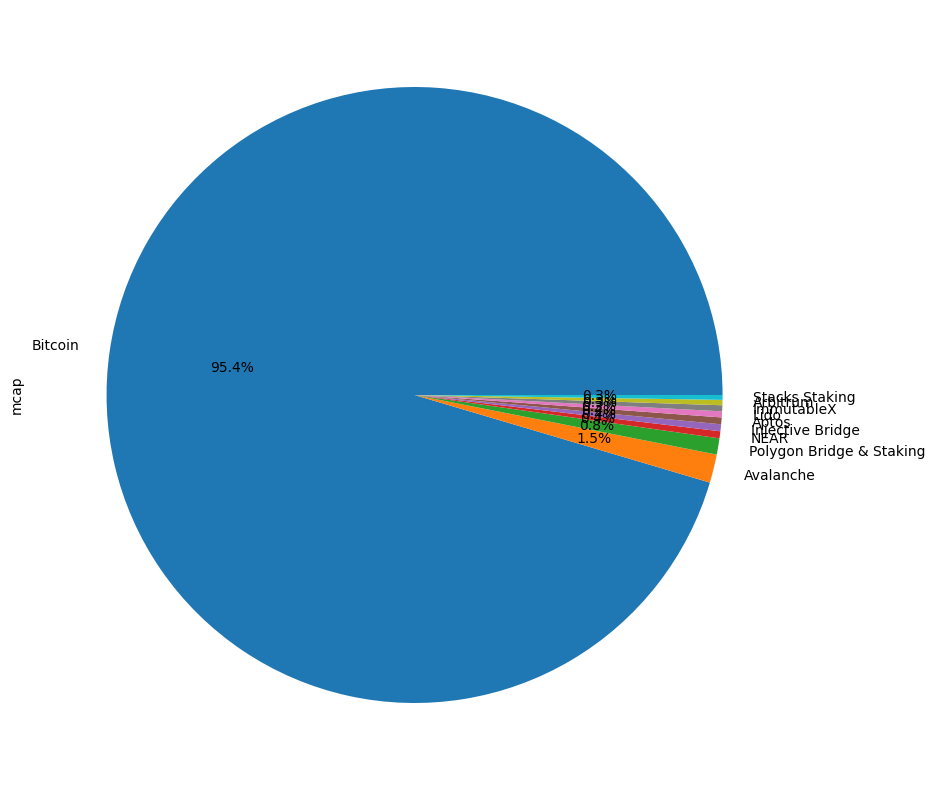

In [28]:
# Creating subset of the dataframe
plot_data = df[['name', 'mcap']][:10]
plot_data.set_index(keys='name', inplace=True)
plot_data.plot(x='name', y='mcap', kind='pie', figsize=(10, 10), legend=False, autopct='%1.1f%%')

In [35]:
# To check available protocol slugs you can use client.list_protocols()
protocol_slug = 'astroport'
client.get_protocol(protocol_slug)

{'id': '3117',
 'name': 'Astroport',
 'address': 'terra:terra1nsuqsk6kh58ulczatwev87ttq2z6r3pusulg9r24mfj2fvtzd4uq3exn26',
 'symbol': 'ASTRO',
 'url': 'https://astroport.fi',
 'description': 'The meta AMM of Cosmos',
 'chain': 'Terra2',
 'logo': 'https://icons.llama.fi/astroport.jpg',
 'audits': '2',
 'audit_note': None,
 'gecko_id': 'astroport-fi',
 'cmcId': '23374',
 'category': 'Dexes',
 'chains': ['Neutron', 'Terra2', 'Injective', 'Sei'],
 'module': 'astroport/index.js',
 'twitter': 'astroport_fi',
 'audit_links': ['https://github.com/astroport-fi/astro-audits'],
 'openSource': True,
 'listedAt': 1686894797,
 'github': ['astroport-fi'],
 'chainTvls': {'Neutron': {'tvl': [{'date': 1686873600,
     'totalLiquidityUSD': 14421444.06292},
    {'date': 1686960000, 'totalLiquidityUSD': 14451752.82346},
    {'date': 1687046400, 'totalLiquidityUSD': 14539043.76892},
    {'date': 1687132800, 'totalLiquidityUSD': 14378064.315},
    {'date': 1687219200, 'totalLiquidityUSD': 14477688.52027},
  

In [37]:
protocols = list(df['name'][:10])
protocols = [item.replace(' ', '-').lower() for item in protocols]
protocols

['bitcoin',
 'avalanche',
 'polygon-bridge-&-staking',
 'near',
 'injective-bridge',
 'aptos',
 'immutablex',
 'lido',
 'arbitrum',
 'stacks-staking']

In [38]:
# Setting number of days for data slicing
days = 120
df = pd.DataFrame()
for protocol in protocols:
   response = client.get_protocol(protocol)
   # Obtaining TVL values from the response data
   response = response['tvl']
   # Reversing the list to set descendiong order of date
   response.reverse()
   # Creating column 'date' only once
   if 'date' not in df:
      df['date'] = pd.Series([response[idx]['date'] for idx in range(days) if idx <= len(response)-1])
      df['date'] = pd.to_datetime(df['date'],unit='s')
      
   df[protocol] = pd.Series([response[idx]['totalLiquidityUSD'] for idx in range(days) if idx <= len(response)-1])
df.sort_values(by='date', ascending=False, inplace=True)
df.set_index(keys='date', drop=True, inplace=True)
df.fillna(value=0, axis=1, inplace=True)
df.head()

,bitcoin,avalanche,polygon-bridge-&-staking,near,injective-bridge,aptos,immutablex,lido,arbitrum,stacks-staking
date,,,,,,,,,,
2023-10-12,0.0,0.0,6.404104e+09,0.0,3.659598e+07,0.0,3.624419e+07,2.240311e+10,0.0,0.0
2023-10-11,0.0,0.0,6.420482e+09,0.0,3.506939e+07,0.0,3.611907e+07,2.189739e+10,0.0,0.0
2023-10-10,0.0,0.0,6.285923e+09,0.0,3.491867e+07,0.0,3.554091e+07,2.126377e+10,0.0,0.0
2023-10-09,0.0,0.0,6.276520e+09,0.0,3.470394e+07,0.0,3.582033e+07,2.139244e+10,0.0,0.0
2023-08-31,0.0,0.0,6.135722e+09,0.0,3.465696e+07,0.0,3.524597e+07,2.136893e+10,0.0,0.0


array([[<Axes: xlabel='Date', ylabel='Total Value Locked'>],
       [<Axes: xlabel='Date', ylabel='Total Value Locked'>],
       [<Axes: xlabel='Date', ylabel='Total Value Locked'>],
       [<Axes: xlabel='Date', ylabel='Total Value Locked'>],
       [<Axes: xlabel='Date', ylabel='Total Value Locked'>],
       [<Axes: xlabel='Date', ylabel='Total Value Locked'>],
       [<Axes: xlabel='Date', ylabel='Total Value Locked'>],
       [<Axes: xlabel='Date', ylabel='Total Value Locked'>],
       [<Axes: xlabel='Date', ylabel='Total Value Locked'>],
       [<Axes: xlabel='Date', ylabel='Total Value Locked'>]], dtype=object)

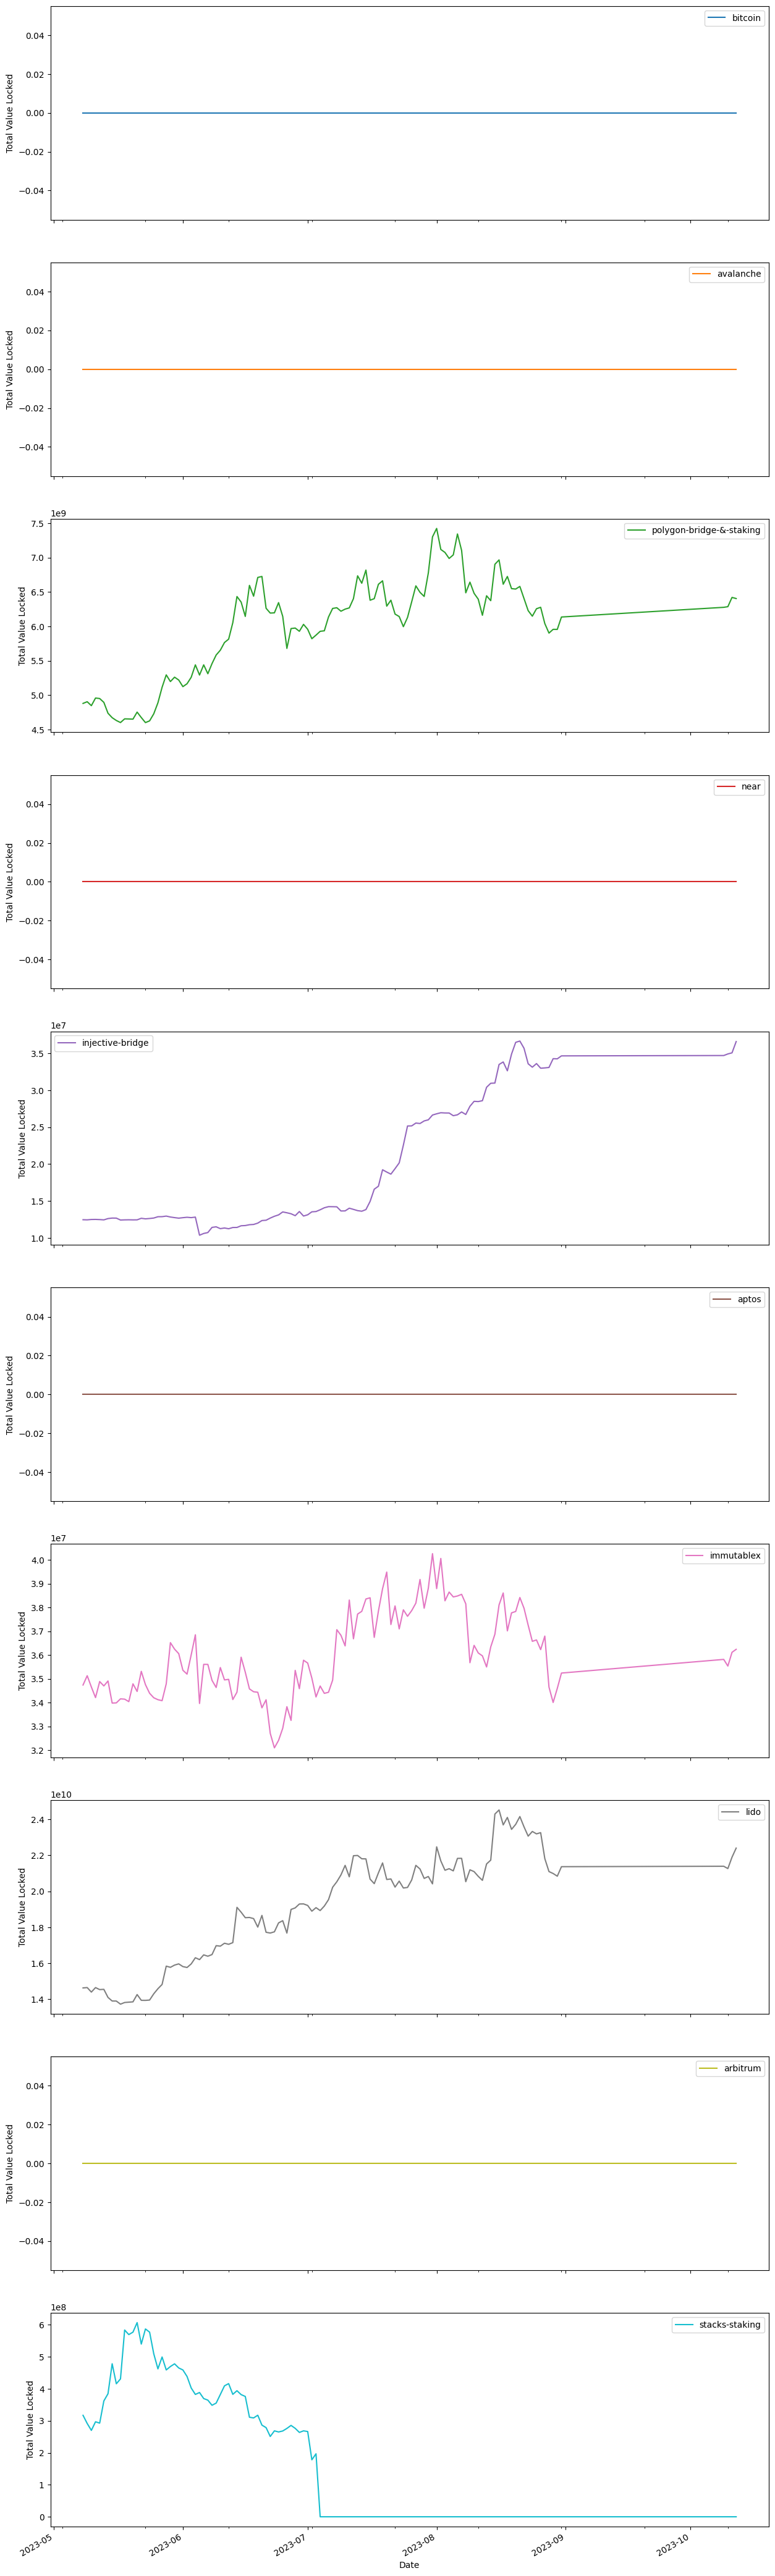

In [40]:
df.plot(subplots=True, layout=(10, 1), figsize=(15, 60), xlabel='Date', ylabel='Total Value Locked')

In [41]:
data = df[['polygon-bridge-&-staking']].copy()
data.rename(columns={'polygon-bridge-&-staking':'tvl'}, inplace=True)
data.reset_index(inplace=True)
data.head()

,date,tvl
0,2023-10-12,6.404104e+09
1,2023-10-11,6.420482e+09
2,2023-10-10,6.285923e+09
3,2023-10-09,6.276520e+09
4,2023-08-31,6.135722e+09


In [43]:
data_cds = cds(data)
# Creating deep copy to modify the data for model training
data_df = copy.deepcopy(data)
data_df.columns = ['ds', 'y']
# Using Meta's Prophet library
# Setting daily_seasonlaity true for daily data
m = Prophet(interval_width=0.90, daily_seasonality=True, yearly_seasonality=True)
model = m.fit(data_df)
# Predicting for the next 3 month period
future = m.make_future_dataframe(periods=3, freq='ME')
forecast = m.predict(future)

18:53:15 - cmdstanpy - INFO - Chain [1] start processing
18:53:15 - cmdstanpy - INFO - Chain [1] done processing


/workspaces/DE-Zoomcamp24/.venv/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/workspaces/DE-Zoomcamp24/.venv/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


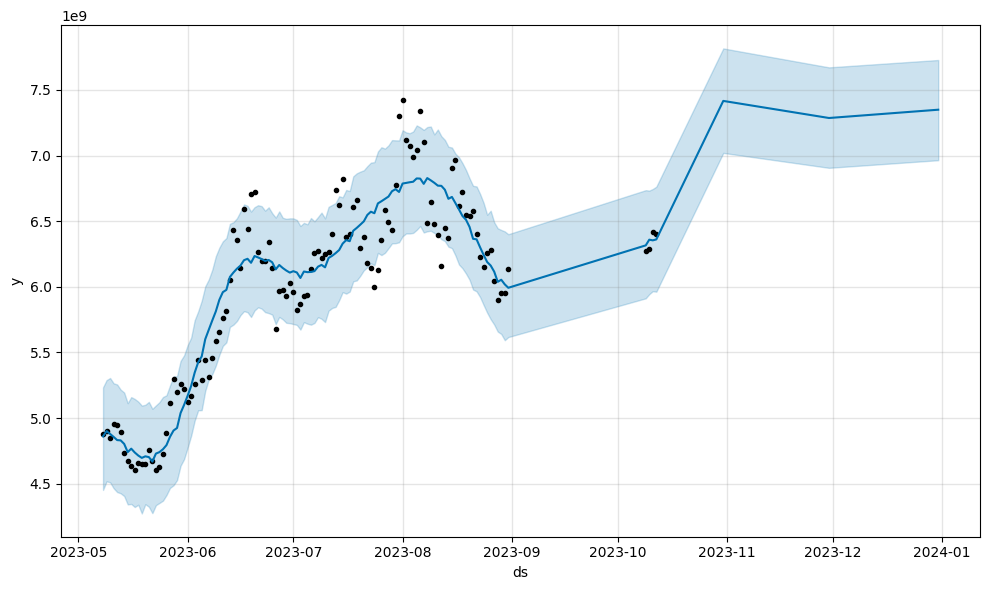

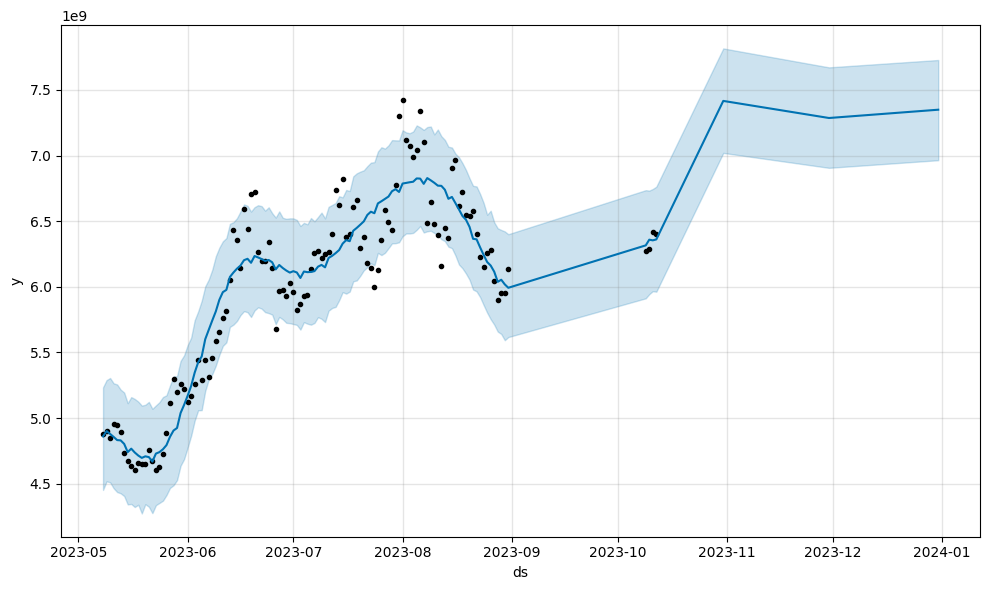

In [44]:
m.plot(forecast)

/workspaces/DE-Zoomcamp24/.venv/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/workspaces/DE-Zoomcamp24/.venv/lib/python3.10/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/workspaces/DE-Zoomcamp24/.venv/lib/python3.10/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects inste

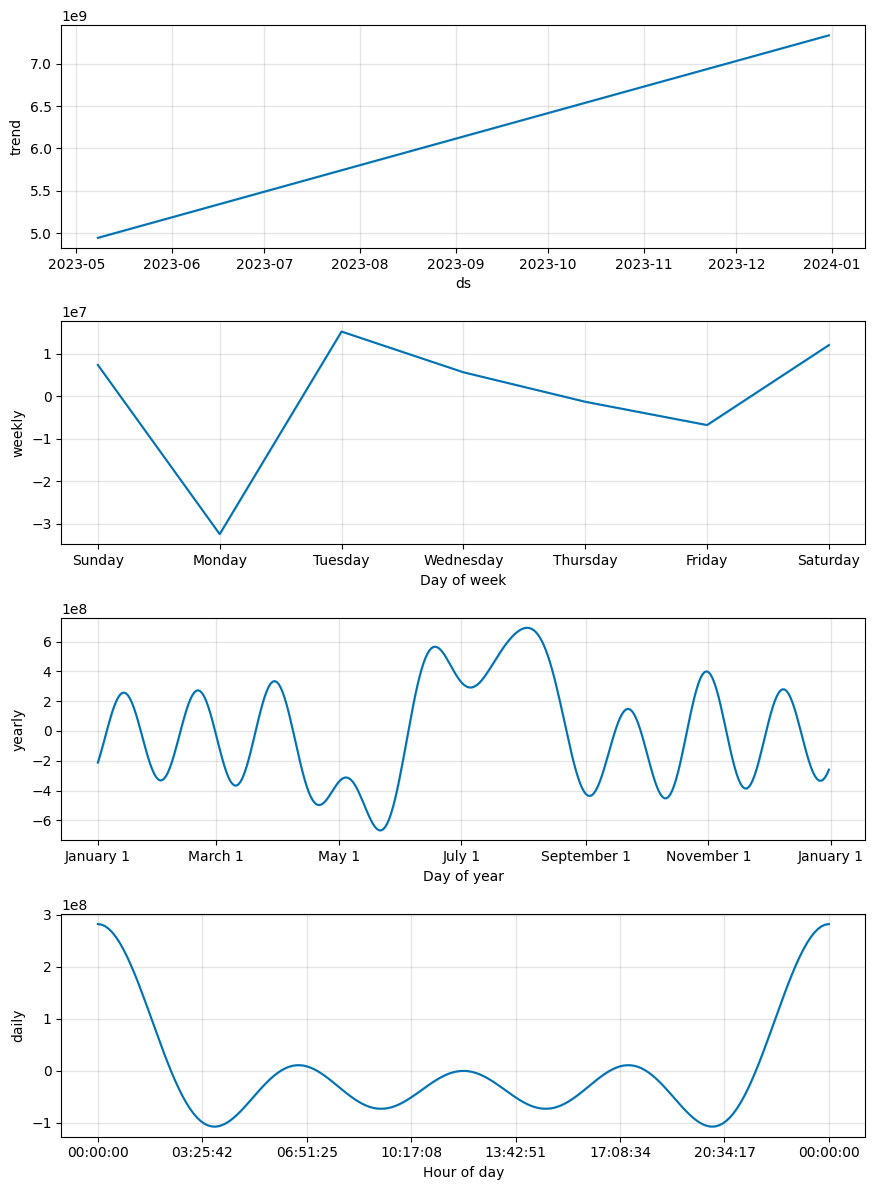

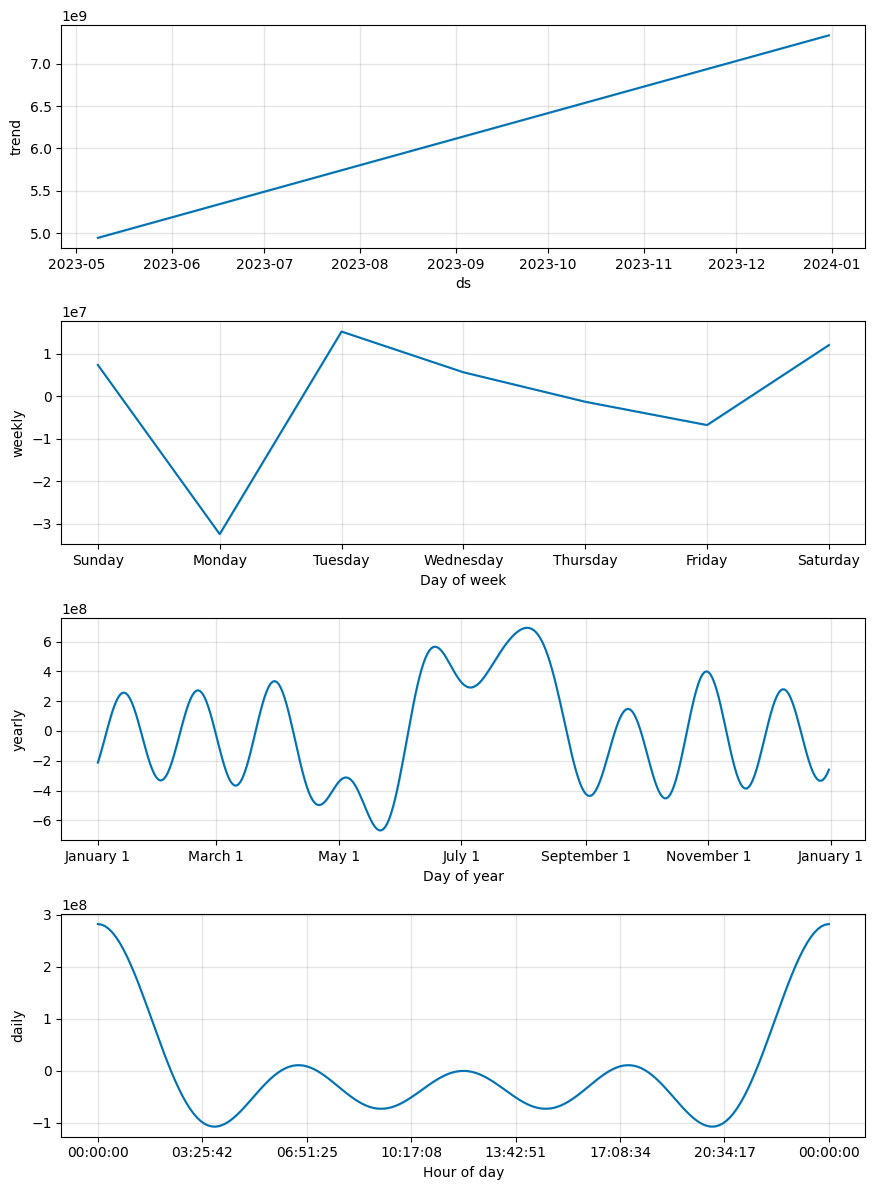

In [45]:
m.plot_components(forecast)

In [48]:
forecast['tvl'] = data.sort_values(by='date')['tvl']
forecast_cds = cds(forecast)
# Creating a hover over the plot
hover = HoverTool(tooltips = [('Date', '@ds{%F | %R}'),
('Total Value Locked', '@tvl{($ 0.00 a)}'),
('Upper Bound','@yhat_upper{($ 0.00 a)}'),
('Prediction','@yhat{($ 0.00 a)}'),
('Lower Bound','@yhat_lower{($ 0.00 a)}')],
formatters={'@ds': 'datetime'},
name=['ytd_lido'],
mode='vline')
# Creating the plot
p = figure(title="Model Prediction",x_axis_type="datetime", x_axis_label='Time', y_axis_label='Price_USD', plot_width=1000, plot_height=500)
p.line(source=data_cds, x='date', y='tvl', legend_label='TVL',line_width=2,color='red')
p.varea(source= forecast_cds, x='ds', y1 = 'yhat_lower',y2 = 'yhat_upper', legend_label="TVL Bounds", color="navy", alpha=0.2)
p.line(source= forecast_cds, x='ds', y = 'yhat', legend_label="Predicted TVL", line_width=2, color='blue', name='ytd_aave')
p.legend.location = "top_left"
prediction_start_date = time.mktime(dt(2022, 5, 1, 0, 0, 0).timetuple())*1000
prediction_start = Span(location=prediction_start_date,dimension='height', line_color='green',line_dash='dashed', line_width=3)
p.add_layout(prediction_start)
june_start_date = time.mktime(dt(2022, 6, 1, 0, 0, 0).timetuple())*1000
june_start = Span(location=june_start_date,dimension='height', line_color='magenta',line_dash='dashed', line_width=1)
p.add_layout(june_start)
july_start_date = time.mktime(dt(2022, 7, 1, 0, 0, 0).timetuple())*1000
july_start = Span(location=july_start_date,dimension='height', line_color='magenta',line_dash='dashed', line_width=1)
p.add_layout(july_start)
august_start_date = time.mktime(dt(2022, 8, 1, 0, 0, 0).timetuple())*1000
august_start = Span(location=august_start_date,dimension='height', line_color='magenta',line_dash='dashed', line_width=1)
p.add_layout(august_start)
p.add_tools(hover)
p.yaxis.formatter=NumeralTickFormatter(format="$ 0.00 a")
show(p)

ValueError: failed to validate HoverTool(id='p1018', ...).name: expected either None or a value of type String, got ['ytd_lido']